In [203]:
import talib
import pandas as pd
import connectorx as cx
import numpy as np
from importlib import reload

In [206]:
import datafunc; reload(datafunc)
from datafunc import *

In [75]:
vars = ['ticker', 'date', 'close', 'volume']

In [88]:
df = get_top_stocks_cx(5000, since='2022-01-01', vars=vars)

In [132]:
df['low'] = n_week_low(df, 52)

In [152]:
df['high'] = n_week_high(df, 52)

In [133]:
df['lowdistance'] = df['close'] / df['low']

In [177]:
df['highdistance'] = df['high'] / df['close']

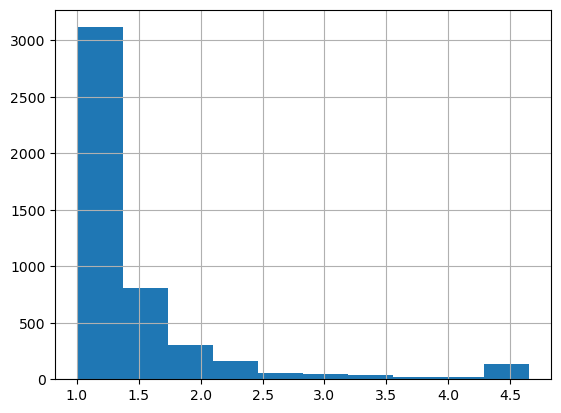

In [157]:
hist(df, 'lowdistance', 1, latest=True)

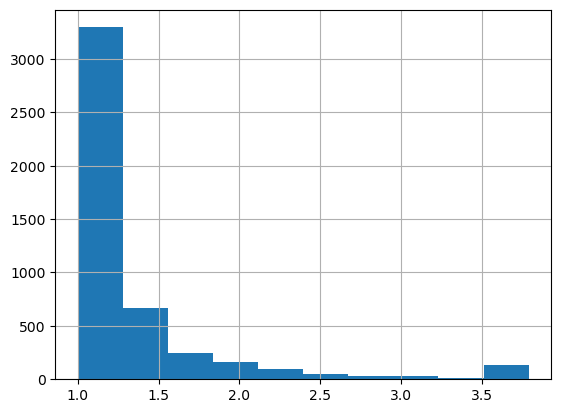

In [179]:
hist(df, 'highdistance', 0.99, latest=True)

In [180]:
now = df[df.date==df.date.max()]

In [173]:
df['ldlog'] = np.log(df.lowdistance)
df['hdlog'] = np.log(df.highdistance)

In [190]:
now.shape

(5000, 12)

In [194]:
now2 = remove_outliers(now, ['low', 'high'])

[0.14794600000000036, 648.6324000000009]
[2.24, 641.2039999999988]


<Axes: xlabel='lowdistance', ylabel='highdistance'>

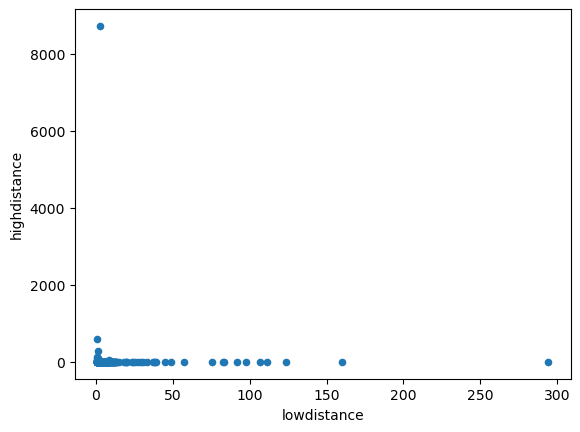

In [201]:
remove_max(now, 'lowdistance').plot.scatter(x='lowdistance', y='highdistance')

<Axes: xlabel='lowdistance', ylabel='highdistance'>

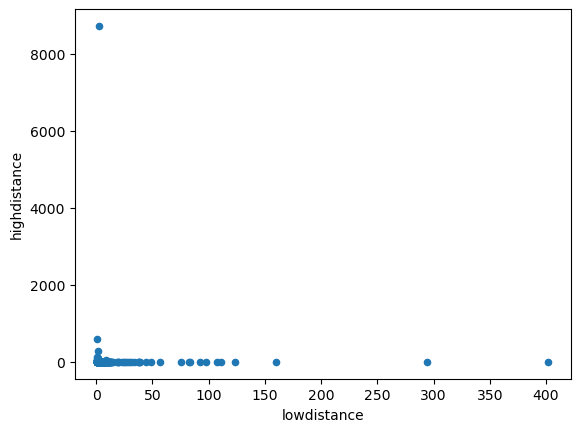

In [199]:
now.plot.scatter(x='lowdistance', y='highdistance')